**Importing Libraries**

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import statsmodels.api as sm

Reading dataset

In [91]:
df=pd.read_csv("Data.csv")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Checking NA values

In [93]:
df.isnull().sum()
#There are no NA values

Hours     0
Scores    0
dtype: int64

Correlation Matrix

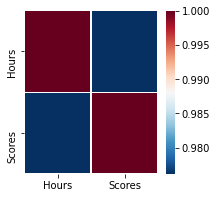

In [94]:
pearsoncorr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            linewidth=0.5,
            ax=ax)
#They are Positively Correlated

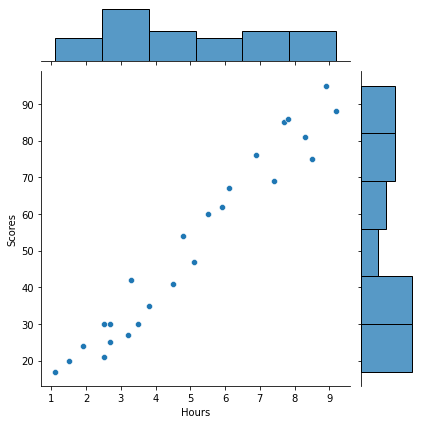

In [95]:
sns.jointplot(x="Hours" ,y="Scores", data=df)

In [96]:
x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

Simple Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)
print("The linear model is: Y = {:.5} + {:.5}X".format(regressor.intercept_[0], regressor.coef_[0][0]))

The linear model is: Y = 2.4837 + 9.7758X


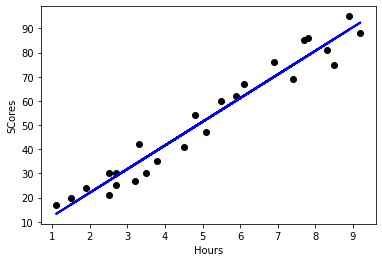

In [98]:
# Visualising the Training set results
pred = regressor.predict(x)
plt.figure(figsize=(6, 4))
plt.scatter(df['Hours'],df['Scores'],c='black')
plt.plot(df['Hours'],pred,c='blue',linewidth=2)
plt.xlabel("Hours")
plt.ylabel("SCores")
plt.show()

**Evaluating the model**

In [99]:
mae = metrics.mean_absolute_error(y, pred)
mse = metrics.mean_squared_error(y, pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 4.972805319866375
MSE: 28.882730509245466
RMSE: 5.374265578592619
R-Squared: 0.9529481969048356


In [100]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        18:01:29   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

**Prediction for studying 9.25 hours a day**

In [101]:
print("Score of the student will be ",regressor.predict(np.array([9.25]).reshape(1, 1)))

Score of the student will be  [[92.90985477]]
